# Matplotlib
> The only plotting library you will need

We use Matplotlib to do nearly all figures/plotting in this course, as well as in general. Today we will cover the basics of a few plotting functions and show you how to structure your code to build more complex plots

As the name implies, Matplotlib has many similarities to the built-in plotting features of matlab, so some commands may be familiar


In [3]:
# for the most part we will be using the `pyplot` module of matplotlib. Just like numpy we almost never see it imported as it's normal name
import matplotlib.pyplot as plt
# we will also import numpy for some examples
import numpy as np

In jupyter notebooks matplotlib is automatically imported in what we call "inline" mode. Which means all plots will appear in-line with your notebook

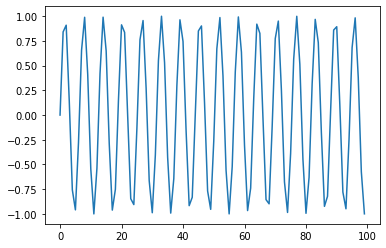

In [4]:
# you can create a quick plot using the functional interface
plt.plot(np.sin(np.arange(0, 100)))

You'll notice that in the above command we only had to specify a single input. This is because matplotlib will assume that if you have only a single input you've given it the `y` data, and the `x` data will a monotonic sequence of the same length. Starting at 0 and going to `len(y) - 1`

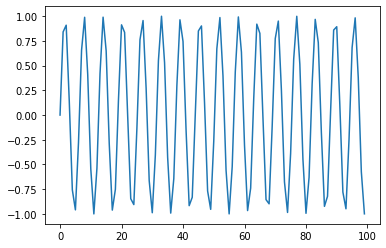

In [5]:
# to get an equivilant plot:
plt.plot(np.arange(0, 100), np.sin(np.arange(0, 100)))

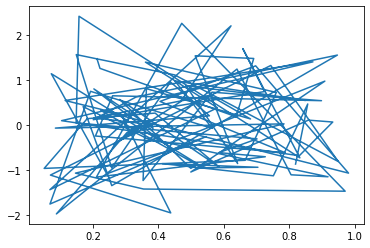

In [6]:
# or to use different x data
x_data = np.random.uniform(0, 1, 100)
y_data = np.random.normal(0, 1, 100)
plt.plot(x_data, y_data)

While the functional interface is easy to use, the object oriented interface is more powerful

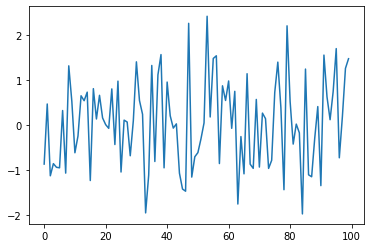

In [7]:
# The object oriented interface is more powerful:
fig, axs = plt.subplots(nrows=1, ncols=1)
axs.plot(y_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5843547860>,
      dtype=object)

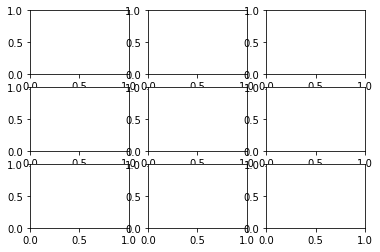

In [9]:
# you can create multi-axis plots using the subplot command, the axes objects are stored in an array
fig, axs = plt.subplots(nrows=3, ncols=3)
axs

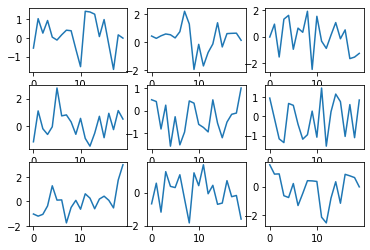

In [8]:
# you can create multi-axis plots using the subplot command, the axes objects are stored in an array
fig, axs = plt.subplots(nrows=3, ncols=3)
for i in range(3):
    for j in range(3):
        axs[i,j].plot(np.random.normal(0, 1, 20))

## Matplotlib Exercises
Do the following for $$ \{x \in \mathbb{Z} | 0 \leq x < 100 \}$$
- Plot the function: $$ y = cos(x) $$
- Plot the `cos(x)` on the y axis and `sin(x)` on the x axis
- Plot side-by-side $$ y = cos(x), y = -cos(x)$$
- Plot the following function with a log y scale $$ y= sin(x) $$

## Bonus plotting
- Change the plot size
- Plot a scatter plot

# Classes and Objects
I will re-iterate that this is not a programming course, and I'm not here to teach you the basics of coding. However, there are some important concepts I will go over in lab that I expect you to work on on your own if you want to succeed in this class.

Object oriented programming is one of them: the concept of classes and objects is incredibly important in Python (and many other languages). In this section we will review the basics of class definitions and demonstrate a few common cases.

## Class Definitions

In [16]:
# example class with lots going on
class ExampleClass(object):
    static_var = 'static'
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y
    
    def multiply(self):
        return self.x * self.y

    def swap(self):
        temp_x = self.x
        self.x = self.y
        self.y = temp_x
    
    def replace(self, x=None, y=None):
        if x is not None:
            self.x = x
        if y is not None:
            self.y = y

In [17]:
# before we break down whats going on, here is an example of usage:

# instance create
example_1 = ExampleClass(1, 2)
example_2 = ExampleClass(3, 4)
# now you can call methods on them
print(example_1.multiply())
print(example_2.multiply())

# objects carry state
example_1.replace(x=12)
print(example_1.multiply())

# classes, like lists, are mutable. So when you do an assignment you're working with a reference and don't automatically perform as deep copy
example_1_copy = example_1
print(example_1.x)
example_1_copy.swap()
print(example_1.x)

2
12
24
12
2


Now let's get into the semantics of classes. Starting at the top:

```
class ExampleClass(object):
```
We have three key things here:
1. `class` --> a keyword to indicate we are creating a class
2. `ExampleClass` --> the name of the class. Although this isn't a rule it is good practice to use Upper CamelCase
    - Sidenote: you'll see me use `snake_case` for variables and upper `CamelCase` for classes. See [PEP 8](https://www.python.org/dev/peps/pep-0008/#naming-conventions) for a full review of naming conventions
3. `object` --> This is the class which we are inheriting from. Since in python everything is by default an `object`, inheriting from `object` is meaningless. I could have used `class ExampleClass:` for the same effect

```
class ExampleClass(object):
    static_var = 'static'
```

Looking now at the next line, we can see `static_var` declared. This variable is a little tricky, as it is actually part of the class rather than the instance. This means that we can call `ExampleClass.static_var` and get the value.

But what does this mean if we change the value of `static_var`?

In [18]:
# looks normal, if we change the value of one of the instances the other remains the same
print(example_1.static_var)
print(example_2.static_var)
example_1.static_var = 'dynamic'
print(example_1.static_var)
print(example_2.static_var)

static
static
dynamic
static


However, this is one of those cases where variable mutability matters! Let's make static_var a list instead of a string and see what happens

In [19]:
# example class with lots going on
class ExampleClass(object):
    static_var = ['static']
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y
    
    def multiply(self):
        return self.x * self.y

    def swap(self):
        temp_x = self.x
        self.x = self.y
        self.y = temp_x
    
    def replace(self, x=None, y=None):
        if x is not None:
            self.x = x
        if y is not None:
            self.y = y

In [20]:
example_3 = ExampleClass(1, 2)
example_4 = ExampleClass(3, 4)

In [21]:
print(example_3.static_var)
print(example_4.static_var)
example_3.static_var.append(2)
print(example_3.static_var)
print(example_4.static_var)

['static']
['static']
['static', 2]
['static', 2]


Now it changes. This is because when the instance of the class is created it only copies the **reference** to the variable. 

So what do you do with this information? My advice: be cautious.

Only ever use class variables for static values that you don't expect to change. It isn't worth the hassle of remembering if the data type is mutable or not, and it may end up hurting you.

---

Back to the class:

```
class ExampleClass(object):
    static_var = ['static']
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y
```
 The `__init__` function is automatically called upon instance creation. The variable `self` is a reference to the internal object state and the other variables (in our case `x` and `y`) are used to initiaze the instance.

 You can see we call the `super().__init__()` function. What this does is intializes the parent class of our class. Now since the parent class of our class is the `object` class, this does nothing. The last two lines are simple assignments. Copying over the variables of `x` and `y` to the object's internal state so they can be used later.

**Full Class**
 ```
 class ExampleClass(object):
    static_var = ['static']
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y
    
    def multiply(self):
        return self.x * self.y

    def swap(self):
        temp_x = self.x
        self.x = self.y
        self.y = temp_x
    
    def replace(self, x=None, y=None):
        if x is not None:
            self.x = x
        if y is not None:
            self.y = y
 ```
 You can see we defined a few functions here, some with inputs some without. You'll also see the keyword `self` a lot. `self` refers to the object it**self**. For most functions you'll have that as the first argument, and use that reference to access the object's internal state.

 **Note**:
 - `self` doesn't need to be called `self`, but you shouldn't call it anything else (it'll just be confusing). The meaning comes from it being the first variable rather than the name
 - There are things called *Static Methods* which don't need `self`, but we won't go into those.
 - Methods with `self` in them can't be called on the class, they must be called on an instance

## Class Exercise 1

1. Create a class called `Person` which has the following characteristics
    - Input variables which set the person's age and name
    - A function returns the person's age categorization with the following condtionals:
        - < 1 = infant
        - < 11 = child
        - < 18 = teenager
        - otherwise: adult
    - Write a function which updates the name
    - Write a function called `birthday` which increases the person's age by `1` and returns the new age

Create an instance of your class and test all your functions

## Class Exercise 2

2. Create a class called `Student` which inherits from `Person` and has the following characteristics
    - Input variables which set the student's major and university name
    - A function returns a desciption of the student
        - Their name, age, major and university

**Aside**: String formatting
- String formatting is super simple in python. You can insert variables directly into strings using "f strings":
```
x = 10
y = 100
v = "hello"
new_str = f"{v} world x is equal to {x}, Y is equal to {y}"
```
